<h1 align="center">📊🔍⚠️ Outlier detection in a dataset </h1>

In [26]:
import matplotlib.pyplot as plt
import pandas as pd 
import morethemes as mt
mt.set_theme("ft")
import warnings
warnings.filterwarnings("ignore")

In [27]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X = data[["Annual Income (k$)","Spending Score (1-100)"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [29]:
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [30]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_
data['Cluster'] = labels

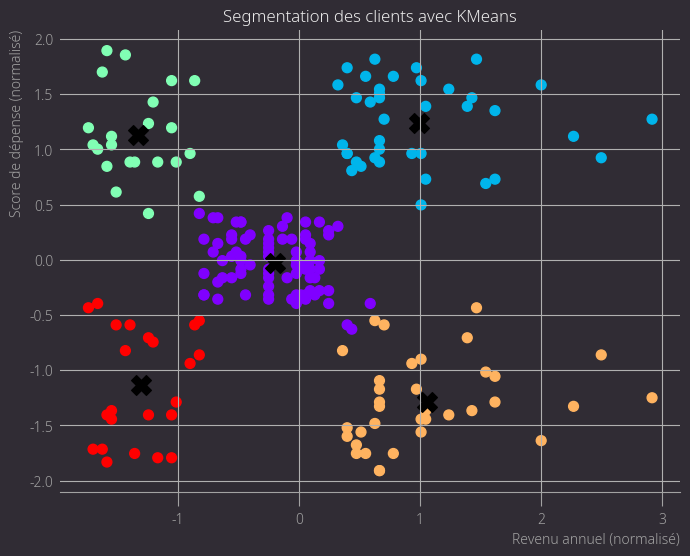

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='rainbow', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X')
plt.xlabel("Revenu annuel (normalisé)")
plt.ylabel("Score de dépense (normalisé)")
plt.title("Segmentation des clients avec KMeans")
plt.grid(True)
plt.show()


In [32]:
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", round(score, 3))


Silhouette Score: 0.555


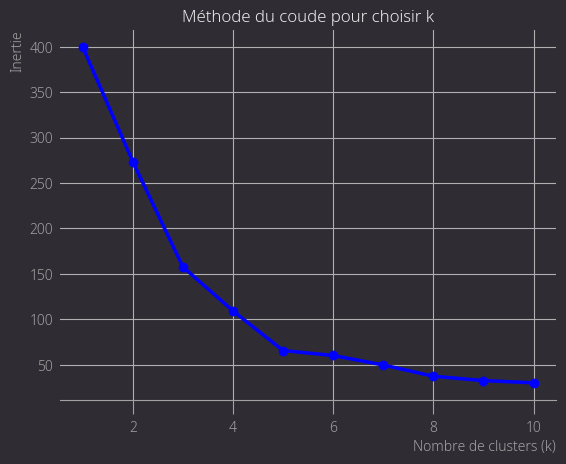

In [33]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd


inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Visualiser la méthode du coude
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title("Méthode du coude pour choisir k")
plt.grid(True)
plt.show()


In [37]:
data["Cluster"]

0      4
1      2
2      4
3      2
4      4
      ..
195    1
196    3
197    1
198    3
199    1
Name: Cluster, Length: 200, dtype: int32

In [45]:
data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [36]:
# Exemple : si cluster 1 = gros dépensiers
data['Segment'] = data['Cluster'].map({
    0: 'Prudents',
    1: 'Gros dépensiers',
    2: 'Clients moyens',
    3: 'Faible revenu',
    4: 'VIP'
})

data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Segment
0,1,Male,19,15,39,4,VIP
1,2,Male,21,15,81,2,Clients moyens
2,3,Female,20,16,6,4,VIP
3,4,Female,23,16,77,2,Clients moyens
4,5,Female,31,17,40,4,VIP
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,Gros dépensiers
196,197,Female,45,126,28,3,Faible revenu
197,198,Male,32,126,74,1,Gros dépensiers
198,199,Male,32,137,18,3,Faible revenu


In [41]:
data.groupby('Cluster')["Annual Income (k$)"].mean()


Cluster
0    55.296296
1    86.538462
2    25.727273
3    88.200000
4    26.304348
Name: Annual Income (k$), dtype: float64

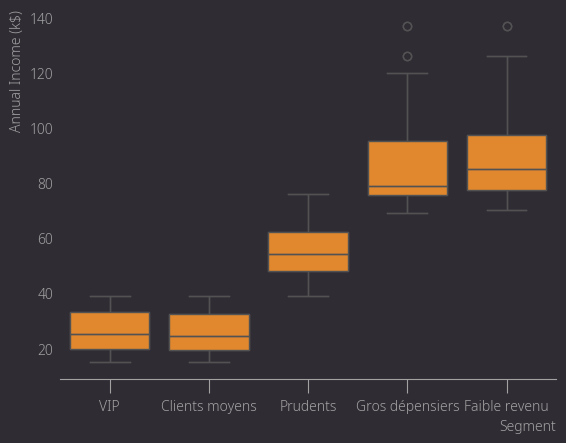

In [44]:
import seaborn as sns

sns.boxplot(x='Segment', y='Annual Income (k$)', data=data)
plt.show()

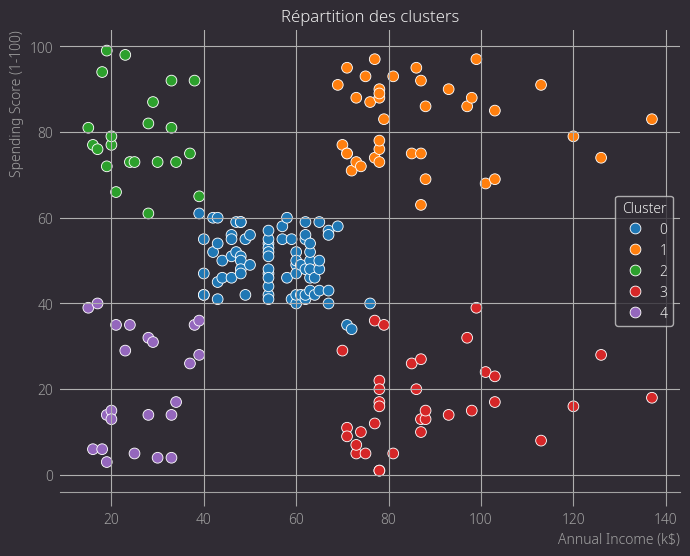

In [46]:

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Cluster', 
    palette='tab10', 
    data=data,
    s=60
)
plt.title('Répartition des clusters')
plt.grid(True)
plt.show()


2025-05-10 22:50:24.560 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 22:50:24.661 
  command:

    streamlit run c:\Users\KOVVO\anaconda3\envs\Timo\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-10 22:50:24.662 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 22:50:24.672 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 22:50:24.673 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 22:50:24.673 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 22:50:24.674 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 22:50:24.675 Session state